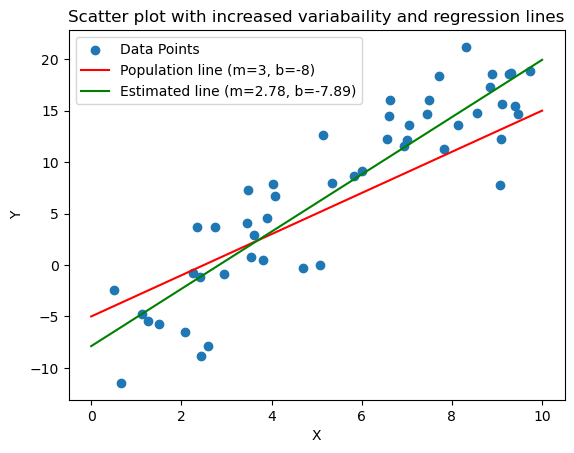

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Genearte the data
X = 10 * np.random.rand(50)
y = 3 * X - 8 + np.random.randn(50) * 4 # True population relation

# Fit a linear regression model
X= X.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)

# Caclulate the predicted values
y_pred = model.predict(X)

# Plot the scatter plot and regression lines
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with increased variabaility and regression lines')

# Plot the actual population line
x_line = np.linspace(0, 10, 100)
y_actual = 2 * x_line - 5
plt.plot(x_line, y_actual, 'r', label='Population line (m=3, b=-8)')

# Plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_estimated, 'g', label=f'Estimated line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})')

# Add legend and show the plot
plt.legend()
plt.show()

In [8]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url)

# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

# Define the dependent variables
y = data['Sales']

# fit the model using the independent adn dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        18:27:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
irrelevant_predictors = np.random.normal(0, 1, (n, 10))

# True relation in the data
y = 2 * x1 + 3 * x2 + np.random.normal(0, 1, n)

# Helper function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Fit linear regression models with differnt predictors
X = pd.DataFrame({'x1':x1, 'x2':x2})
X_with_irrelevant = pd.concat([X] + [pd.Series(irrelevant_predictors[:, i], name=f"irrelevant_{i}") for i in range(10)], axis=1)

model1 = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(X_with_irrelevant, y)

# Calculate R-squared and adjusted R-Squared for each model
models = [('Models with relevant predictors', model1, X.shape[1]), ('Model with irrelevant predictors', 
                                                                    model2, X_with_irrelevant.shape[1])]

for name, model, k in models:
    r2 = r2_score(y, model.predict(X_with_irrelevant.iloc[:, :k]))
    adj_r2 = adjusted_r2(r2, n, k)
    print(f"{name}: R-squared = {r2:.3f}, Adjusted R-squared = {adj_r2:.3f}")

Models with relevant predictors: R-squared = 0.912, Adjusted R-squared = 0.910
Model with irrelevant predictors: R-squared = 0.919, Adjusted R-squared = 0.908


In [10]:
import pandas as pd

df = pd.DataFrame()

df['X'] = [2,3,5,5,7]
df['y'] = [2,4,3,5,5]

df

,X,y
0,2,2
1,3,4
2,5,3
3,5,5
4,7,5


In [11]:
import statsmodels.api as sm

# Add a constant to the independent variable
X = sm.add_constant(df['X'])

# fit the linear regression model
model = sm.OLS(df['y'], X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     3.380
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.163
Time:                        20:09:26   Log-Likelihood:                -5.9769
No. Observations:                   5   AIC:                             15.95
Df Residuals:                       3   BIC:                             15.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6579      1.253      1.323      0.2

c:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
